## Loading the dataset

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [153]:
df=pd.read_csv('../Database/preprocessing_data.csv')
df

,brand,dtime,atime,price,dcity,acity,flight_type,class_type,ddate,flytime_hours
0,Vietravel Airlines,23:59:00,02:15:00,1377000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.266667
1,VietJet Air,22:25:00,00:35:00,1447000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.166667
2,VietJet Air,23:30:00,01:35:00,1447000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.083333
3,VietJet Air,23:40:00,01:50:00,1447000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.166667
4,VietJet Air,21:40:00,23:50:00,1563000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.166667
...,...,...,...,...,...,...,...,...,...,...
28242,Vietnam Airlines,14:45:00,07:50:00,22820000,dien-bien-phu,con-dao-island,oneway,business,2023-12-23,17.083333
28243,Vietnam Airlines,14:45:00,16:25:00,22743000,dien-bien-phu,Da-lat,oneway,business,2023-12-23,25.666667
28244,Vietnam Airlines,14:45:00,16:25:00,23675000,dien-bien-phu,Da-lat,oneway,business,2023-12-23,25.666667
28245,Vietnam Airlines,14:45:00,08:55:00,20757000,dien-bien-phu,Can-tho,oneway,business,2023-12-23,18.166667


chia khung thời gian ra làm các mục khác nhau
tạo 2 cột dtime_category và atime_category

In [154]:
categories = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']
time_ranges = [(0, 4), (4, 8), (8, 12), (12, 16), (16, 20), (20, 24)]

def categorize_time(hour):
    for i, (start, end) in enumerate(time_ranges):
        if start <= hour < end:
            return categories[i]

df['dtime_category'] = pd.to_datetime(df['dtime']).dt.hour.apply(categorize_time)
df['atime_category'] = pd.to_datetime(df['atime']).dt.hour.apply(categorize_time)
df

C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\3895180758.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dtime_category'] = pd.to_datetime(df['dtime']).dt.hour.apply(categorize_time)
C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\3895180758.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['atime_category'] = pd.to_datetime(df['atime']).dt.hour.apply(categorize_time)


,brand,dtime,atime,price,dcity,acity,flight_type,class_type,ddate,flytime_hours,dtime_category,atime_category
0,Vietravel Airlines,23:59:00,02:15:00,1377000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.266667,Late Night,Early Morning
1,VietJet Air,22:25:00,00:35:00,1447000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.166667,Late Night,Early Morning
2,VietJet Air,23:30:00,01:35:00,1447000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.083333,Late Night,Early Morning
3,VietJet Air,23:40:00,01:50:00,1447000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.166667,Late Night,Early Morning
4,VietJet Air,21:40:00,23:50:00,1563000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.166667,Late Night,Late Night
...,...,...,...,...,...,...,...,...,...,...,...,...
28242,Vietnam Airlines,14:45:00,07:50:00,22820000,dien-bien-phu,con-dao-island,oneway,business,2023-12-23,17.083333,Evening,Morning
28243,Vietnam Airlines,14:45:00,16:25:00,22743000,dien-bien-phu,Da-lat,oneway,business,2023-12-23,25.666667,Evening,Night
28244,Vietnam Airlines,14:45:00,16:25:00,23675000,dien-bien-phu,Da-lat,oneway,business,2023-12-23,25.666667,Evening,Night
28245,Vietnam Airlines,14:45:00,08:55:00,20757000,dien-bien-phu,Can-tho,oneway,business,2023-12-23,18.166667,Evening,Afternoon


## EXPLORE DATA ANALYSIS


In [155]:
import seaborn as sns
import matplotlib.ticker as ticker

### 1. The number of flights for each brand

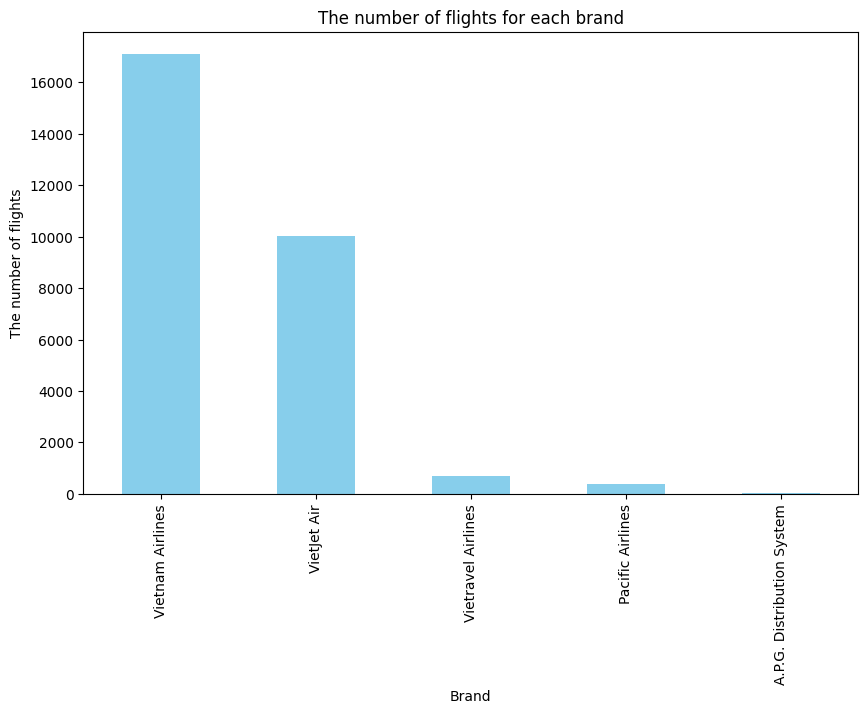

In [156]:
brand_counts = df['brand'].value_counts()

plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar', color='skyblue')
plt.title('The number of flights for each brand')
plt.xlabel('Brand')
plt.ylabel('The number of flights')
plt.show()


VN Airlines là hãng bay có nhiều chuyến bay nhất, tiếp theo đó là Vietjet Air. Ba hãng bay còn lại: Vietravel Airlines, Pacific Airlines, A.P.G Distribution System có rất ít chuyến bay, so sánh số lượng với hai brand lớn kia thì không đáng kể.

### 2. The number of flights departs from a city/ arrives to a city

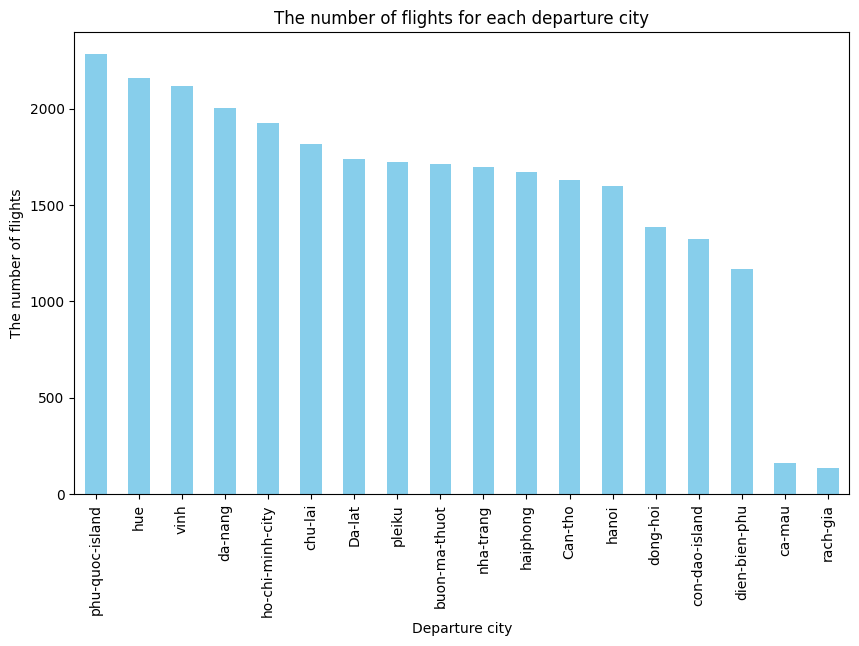

In [51]:
departure_counts = df['dcity'].value_counts()

plt.figure(figsize=(10, 6))
departure_counts.plot(kind='bar', color='skyblue')
plt.title('The number of flights for each departure city')
plt.xlabel('Departure city')
plt.ylabel('The number of flights')
plt.show()


Đảo Phú Quốc là nơi có nhiều điểm bay cất cánh xuất phát nhất, tiếp theo đó là các thành phố như Huế, Vinh, Đà Nẵng. Số lượng chuyến bay xuất phát từ các thành phố giảm dần, khác biệt với nhau không đáng kể quá nhiều. Hai thành phố có số chuyến bay đi ít nhất là Cà Mau và Rạch Giá. 

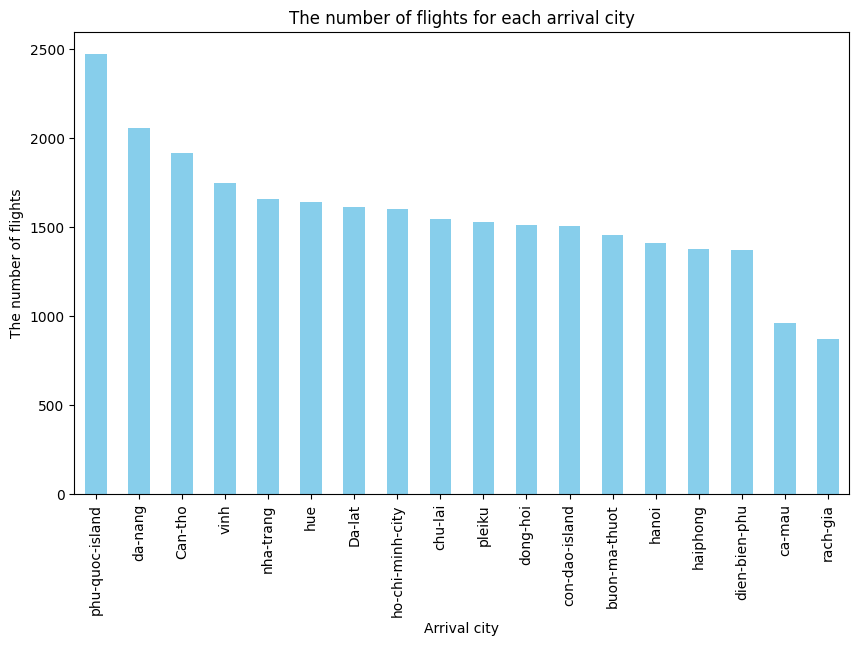

In [52]:
arrival_counts = df['acity'].value_counts()
plt.figure(figsize=(10, 6))
arrival_counts.plot(kind='bar', color='skyblue')
plt.title('The number of flights for each arrival city')
plt.xlabel('Arrival city')
plt.ylabel('The number of flights')
plt.show()


Đảo Phú Quốc cũng là điểm đến của nhiều chuyến bay nhất. Tiếp theo đó là Đà Nẵng, Cần Thơ và Vinh. Điểm đặc biệt ở đây là đây đều là các thành phố nổi tiếng về địa điểm du lịch. Đây có thể là nguyên nhân yếu tố khiến cho các thành phố này trở thành điểm đến phổ biến của các chuyến bay. Cà Mau và Rạch Giá là hai thành phố có số chuyến bay đến ít nhất. 

### 3. The number of flights for each route.

C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\988221055.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_routes['route'] = top_routes['dcity'] + ' -> ' + top_routes['acity']
C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\988221055.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='flight_count', y='route', data=top_routes, palette='viridis')


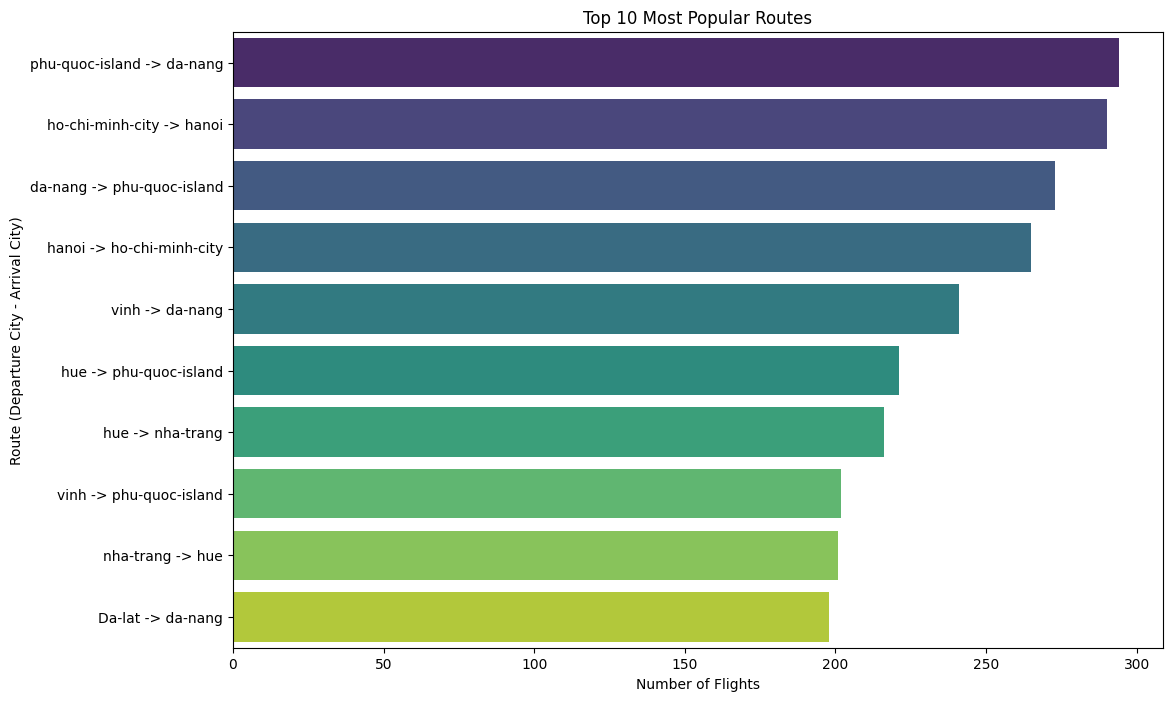

In [53]:
route_counts = df.groupby(['dcity', 'acity']).size().reset_index(name='flight_count')
route_counts = route_counts.sort_values(by='flight_count', ascending=False)

#Top 10 most popular route
top_routes = route_counts.head(10)

#create a new column called route for a pair dcity-acity
top_routes['route'] = top_routes['dcity'] + ' -> ' + top_routes['acity']

#plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='flight_count', y='route', data=top_routes, palette='viridis')
plt.title('Top 10 Most Popular Routes')
plt.xlabel('Number of Flights')
plt.ylabel('Route (Departure City - Arrival City)')
plt.show()


Hình trên hiển thị 10 chặng bay phổ biến nhất, trong đó đứng đầu là chặng bay từ Đảo Phú Quốc tới Đà Nẵng và từ Hà Nội tới HCM. Ngoài chặng bay từ HCM tới HN và từ HN tới HCM (chặng bay mang ý nghĩa di chuyển giữa hai thành phố lớn nhất của hai miền Nam Bắc) thì các chặng bay khác đều kết nối giữa hai thành phố nổi tiếng về du lịch. Có thể thấy được nhu cầu di chuyển của khách du lịch giữa các điểm du lịch lớn ở VN là vô cùng nhiều. 

### 4. The average price for a certain route with different airline brand

In [55]:
average_prices_by_brand = df.groupby(['dcity', 'acity', 'brand'])['price'].mean().reset_index()
average_prices_by_brand['route']=average_prices_by_brand['dcity']+' -> '+average_prices_by_brand['acity']
average_prices_by_brand=average_prices_by_brand.drop(['dcity','acity'],axis=1)
average_prices_by_brand

,brand,price,route
0,VietJet Air,5.505101e+06,Can-tho -> Da-lat
1,Vietnam Airlines,1.699036e+07,Can-tho -> Da-lat
2,VietJet Air,5.864757e+06,Can-tho -> buon-ma-thuot
3,Vietnam Airlines,2.336257e+07,Can-tho -> buon-ma-thuot
4,VietJet Air,7.626520e+06,Can-tho -> chu-lai
...,...,...,...
579,Vietravel Airlines,3.987837e+06,vinh -> phu-quoc-island
580,VietJet Air,3.699446e+06,vinh -> pleiku
581,Vietnam Airlines,1.562076e+07,vinh -> pleiku
582,VietJet Air,7.256024e+06,vinh -> rach-gia


In [60]:
top_routes =['phu-quoc-island -> da-nang','da-nang -> phu-quoc-island','ho-chi-minh-city -> hanoi','vinh -> da-nang'] #top 4 most popular route
selected_routes_df = average_prices_by_brand[average_prices_by_brand['route'].isin(top_routes)]
selected_routes_df


,brand,price,route
207,VietJet Air,3.747609e+06,da-nang -> phu-quoc-island
208,Vietnam Airlines,7.018462e+06,da-nang -> phu-quoc-island
209,Vietravel Airlines,5.883900e+06,da-nang -> phu-quoc-island
364,Pacific Airlines,2.236667e+06,ho-chi-minh-city -> hanoi
365,VietJet Air,2.981246e+06,ho-chi-minh-city -> hanoi
366,Vietnam Airlines,6.841293e+06,ho-chi-minh-city -> hanoi
367,Vietravel Airlines,1.377000e+06,ho-chi-minh-city -> hanoi
464,Pacific Airlines,3.234558e+06,phu-quoc-island -> da-nang
465,VietJet Air,4.159549e+06,phu-quoc-island -> da-nang
466,Vietnam Airlines,7.344153e+06,phu-quoc-island -> da-nang


C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\2222957793.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='route', y='price', hue='brand', data=selected_routes_df, ci=None,palette = 'Set2')


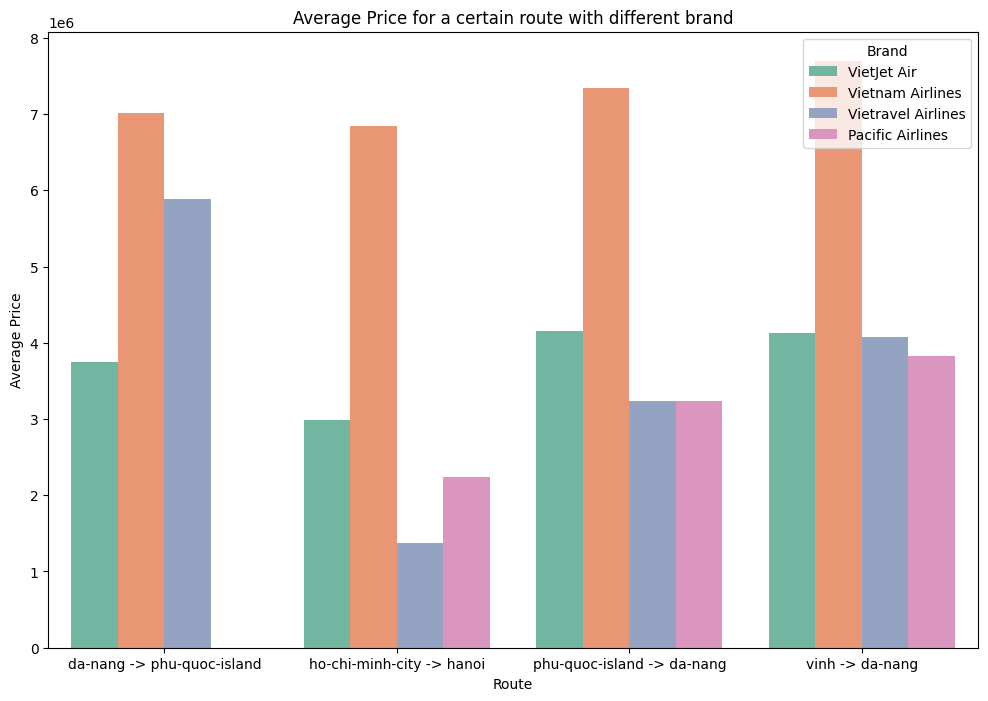

In [65]:
plt.figure(figsize=(12, 8))
sns.barplot(x='route', y='price', hue='brand', data=selected_routes_df, ci=None,palette = 'Set2')

plt.title('Average Price for a certain route with different brand')
plt.xlabel('Route')
plt.ylabel('Average Price')
plt.legend(title='Brand', loc='upper right')

plt.show()

Như ở bên trên đã thống kê thì Vietnam Airlines và Vietjet là hai brand có số lượng chuyến bay là nhiều nhất, tuy nhiên giá cả trung bình trên một lộ trình bay
của Vietnam Airlines so với các brand khác thì lớn hơn hẳn. Còn giá cả của Vietjet thì thuộc dạng giá rẻ, sấp sỉ bằng với hai hãng Vietravel Airlines và Pacific Airlines. 

### 5. The number of flights departs at a time period/ arrives at a time period

Như ở phần load dataset, dữ liệu về thời gian cất cánh/ hạ cánh đã được tạo thêm hai cột để phân loại khoảng thời gian cất cánh/ hạ cánh. Giờ cta sẽ dựa vào đấy để thống kê
số lượng chuyến bay thường được cất cánh/ hạ cánh vào khung giờ nào là nhiều nhất/ ít nhất.

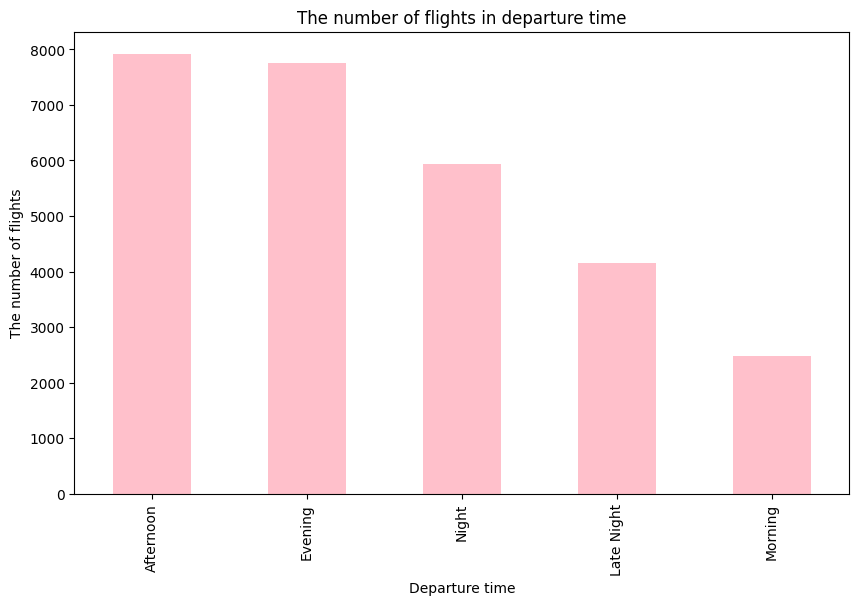

In [67]:
dtime_category_counts = df['dtime_category'].value_counts()

plt.figure(figsize=(10, 6))
dtime_category_counts.plot(kind='bar', color='pink')
plt.title('The number of flights in departure time')
plt.xlabel('Departure time')
plt.ylabel('The number of flights')
plt.show()


Hầu hết các chuyến bay đều ưu tiên khoảng thời gian cất cánh là buổi chiều hoặc buổi tối. Đây là khoảng thời gian tiện lợi cho việc khởi hành. Các chuyến bay khởi hành vào buổi sáng là ít nhất.

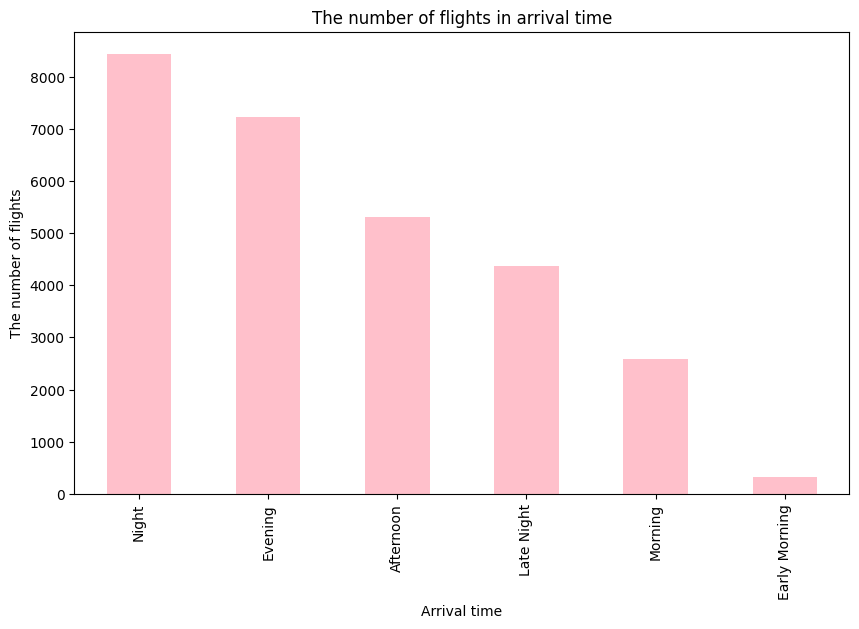

In [68]:
atime_category_counts = df['atime_category'].value_counts()

plt.figure(figsize=(10, 6))
atime_category_counts.plot(kind='bar', color='pink')
plt.title('The number of flights in arrival time')
plt.xlabel('Arrival time')
plt.ylabel('The number of flights')
plt.show()


Các chuyến bay hạ cánh vào khoảng thời gian buổi tối là nhiều nhất, sau đó là buổi chiều. Các chuyến bay hạ cánh vào sáng sớm hay buổi sáng là ít phổ biến nhất.

### 6. The affect of time period on price

Thống kê và so sánh xem cùng một chuyến bay bất kì nhưng do khác biệt về thời gian cất cánh/ hạ cánh thì sẽ ảnh hưởng tới giá cả như thế nào. 

In [129]:
dcity_acity_counts = df.groupby(['dcity', 'acity','brand'])['dtime_category'].nunique().reset_index(name='count')
filtered_dtime_category_data = dcity_acity_counts[dcity_acity_counts['count'] == dcity_acity_counts['count'].max()]
filtered_dtime_category_data

,dcity,acity,brand,count
190,da-nang,con-dao-island,Vietnam Airlines,5
200,da-nang,hanoi,Vietnam Airlines,5
296,haiphong,dien-bien-phu,Vietnam Airlines,5
347,ho-chi-minh-city,Can-tho,Vietnam Airlines,5
359,ho-chi-minh-city,dien-bien-phu,Vietnam Airlines,5
363,ho-chi-minh-city,haiphong,Vietnam Airlines,5
369,ho-chi-minh-city,hue,Vietnam Airlines,5
382,hue,Can-tho,Vietnam Airlines,5
406,hue,nha-trang,Vietnam Airlines,5
426,nha-trang,dien-bien-phu,VietJet Air,5


C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\2047769880.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='dtime_category', y='price', data=grouped_data, ci=None, hue='route', palette=['skyblue', 'pink', 'orange', 'green'])


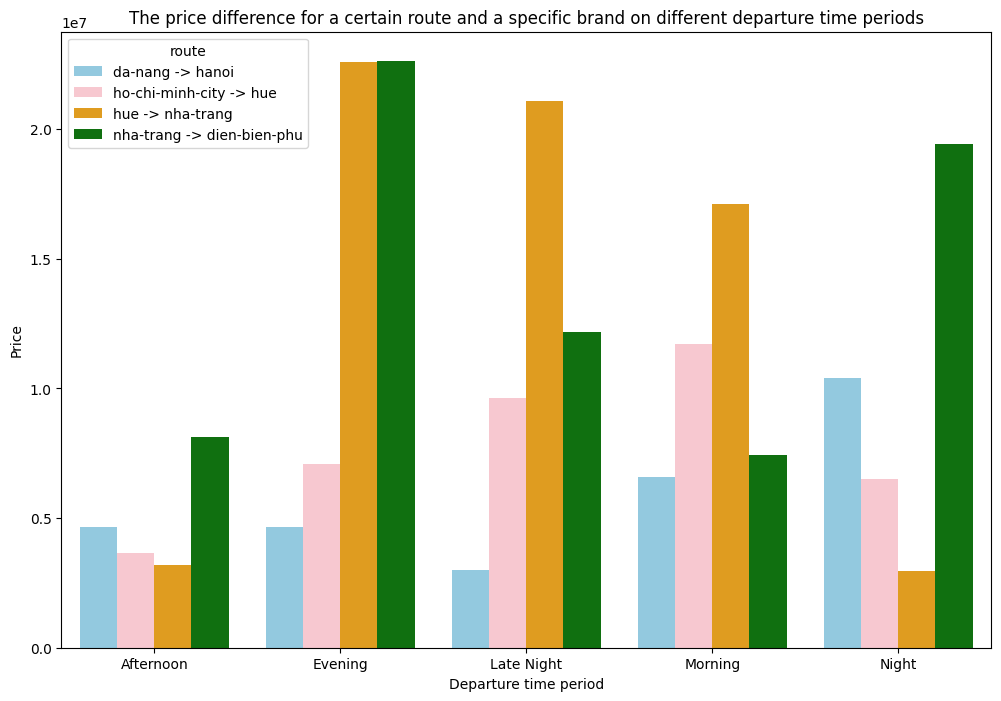

In [157]:
df['route'] = df['dcity'] + ' -> ' + df['acity']
selected_routes=['ho-chi-minh-city -> hue','hue -> nha-trang','da-nang -> hanoi','nha-trang -> dien-bien-phu']

selected_data = df[(df['brand'] == 'Vietnam Airlines') & (df['route'].isin(selected_routes))]
grouped_data = selected_data.groupby(['brand', 'route', 'dtime_category']).agg({'price': 'mean'}).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='dtime_category', y='price', data=grouped_data, ci=None, hue='route', palette=['skyblue', 'pink', 'orange', 'green'])

plt.title('The price difference for a certain route and a specific brand on different departure time periods')
plt.xlabel('Departure time period')
plt.ylabel('Price')

plt.show()


Bên trên thống kê số chuyến bay cất cánh vào buổi chiều, buổi tối là nhiều nhất, còn cất cánh vào buổi sáng là ít nhất. Ở biểu đồ trên, có 4 route đã được chọn randomly, dựa vào biểu đồ có thể thấy thời gian khởi hành có ảnh hưởng lớn tới giá cả. Tuy nhiên với mỗi lộ trình khác nhau thì thời gian khởi hành lại có ảnh hưởng theo cách khác nhau. VD như với 2 route nha-trang -> dien-bien-phu hay hue-> nha-trang thì giá vé nếu khởi hành buổi tối thì sẽ cao, còn buổi chiều hay đêm khuya thì sẽ thấp. Nhưng với ... thì lại khác.

In [136]:
dcity_acity_counts_2 = df.groupby(['dcity', 'acity','brand'])['atime_category'].nunique().reset_index(name='count')
get_unique_atime_categories = lambda x: ', '.join(x.unique())
dcity_acity_counts_2['atime_category_values'] = df.groupby(['dcity', 'acity', 'brand'])['atime_category'].apply(get_unique_atime_categories).reset_index()['atime_category']
filtered_atime_category_data = dcity_acity_counts_2[dcity_acity_counts_2['count'] == dcity_acity_counts_2['count'].max()]
filtered_atime_category_data

,dcity,acity,brand,count,atime_category_values
77,buon-ma-thuot,da-nang,Vietnam Airlines,5,"Late Night, Morning, Night, Afternoon, Evening"
203,da-nang,ho-chi-minh-city,Vietnam Airlines,5,"Night, Early Morning, Late Night, Morning, Eve..."
214,da-nang,vinh,Vietnam Airlines,5,"Afternoon, Night, Morning, Late Night, Evening"
327,hanoi,da-nang,VietJet Air,5,"Afternoon, Late Night, Night, Evening, Morning"
332,hanoi,ho-chi-minh-city,VietJet Air,5,"Early Morning, Late Night, Night, Evening, Aft..."
345,hanoi,vinh,Vietnam Airlines,5,"Afternoon, Late Night, Morning, Night, Evening"
363,ho-chi-minh-city,haiphong,Vietnam Airlines,5,"Evening, Afternoon, Night, Late Night, Morning"
369,ho-chi-minh-city,hue,Vietnam Airlines,5,"Night, Evening, Late Night, Morning, Afternoon"
560,vinh,da-nang,Vietnam Airlines,5,"Night, Evening, Afternoon, Morning, Late Night"


C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\578367027.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='atime_category', y='price', data=grouped_data_2, ci=None, hue='route', palette=['skyblue', 'pink','orange','green'])


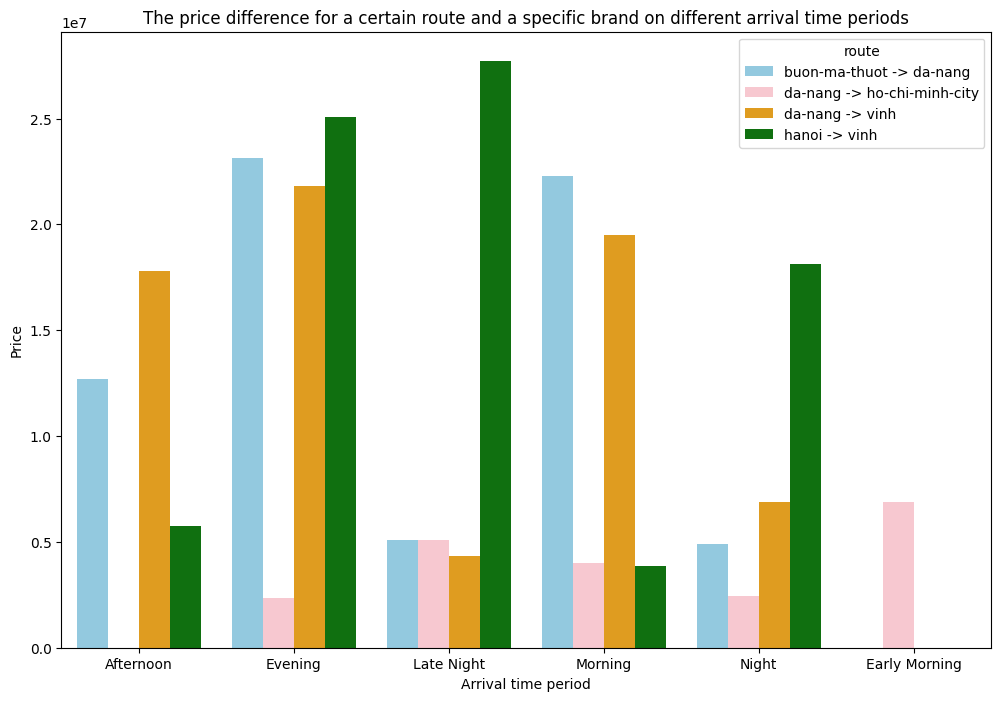

In [137]:
selected_routes_2=['da-nang -> ho-chi-minh-city','hanoi -> vinh','da-nang -> vinh','buon-ma-thuot -> da-nang']
selected_data_2 = df[(df['brand'] == 'Vietnam Airlines') & (df['route'].isin(selected_routes_2))]
grouped_data_2 = selected_data_2.groupby(['brand', 'route', 'atime_category']).agg({'price': 'mean'}).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='atime_category', y='price', data=grouped_data_2, ci=None, hue='route', palette=['skyblue', 'pink','orange','green'])

plt.title('The price difference for a certain route and a specific brand on different arrival time periods')
plt.xlabel('Arrival time period')
plt.ylabel('Price')

plt.show()


ảnh hưởng của giờ hạ cánh tới giá vé cũng z

### 7. Giá vé vs Flytime_hour


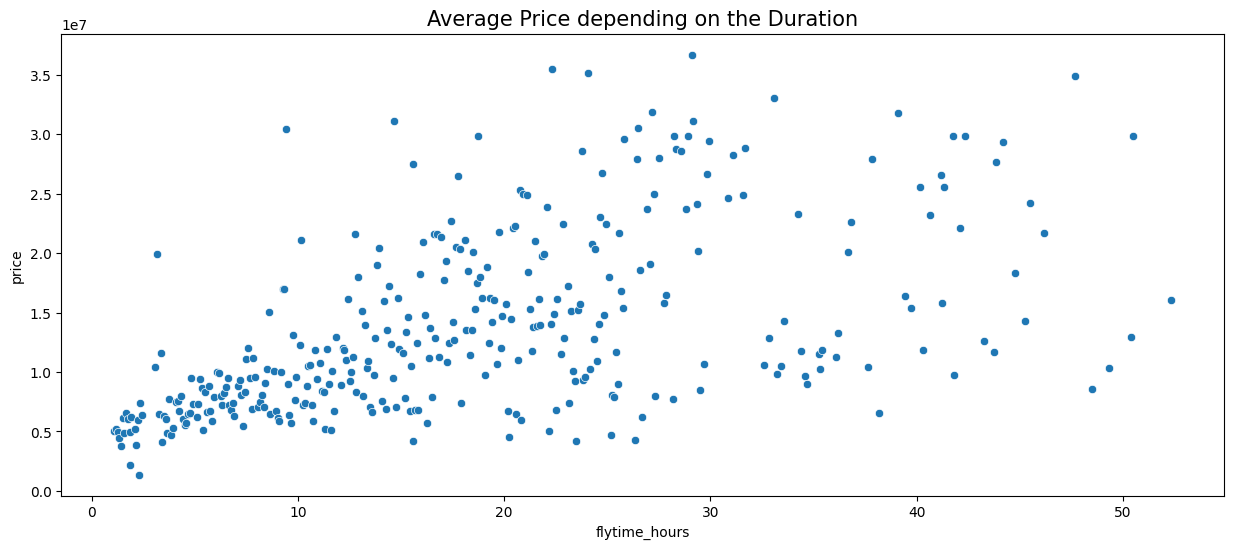

In [140]:
df_temp = df.groupby(['flytime_hours'])['price'].mean().reset_index()
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="flytime_hours", y="price", data=df_temp).set_title("Average Price depending on the Duration",fontsize=15)

The data points in the scatter plot show a positive correlation, which means that as the duration increases, the average price also increases. This trend is not linear, however. The average price increases more slowly as the duration increases.

The scatter plot illustrats the variation in prices for flights of the same duration. There are some flights that are much more expensive than others, even for the same duration.



## Handling Outliners

### 1. Price

Vì price là cái cần quan tâm nên là việc đầu tiên là check outliner của price

In [138]:
def dist_box_plot(df, col):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(df[col], kde=True)
    plt.ticklabel_format(style='plain', axis='x')
    
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha='center')
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\1306819144.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)
C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\1306819144.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, data=df, palette='Set2')


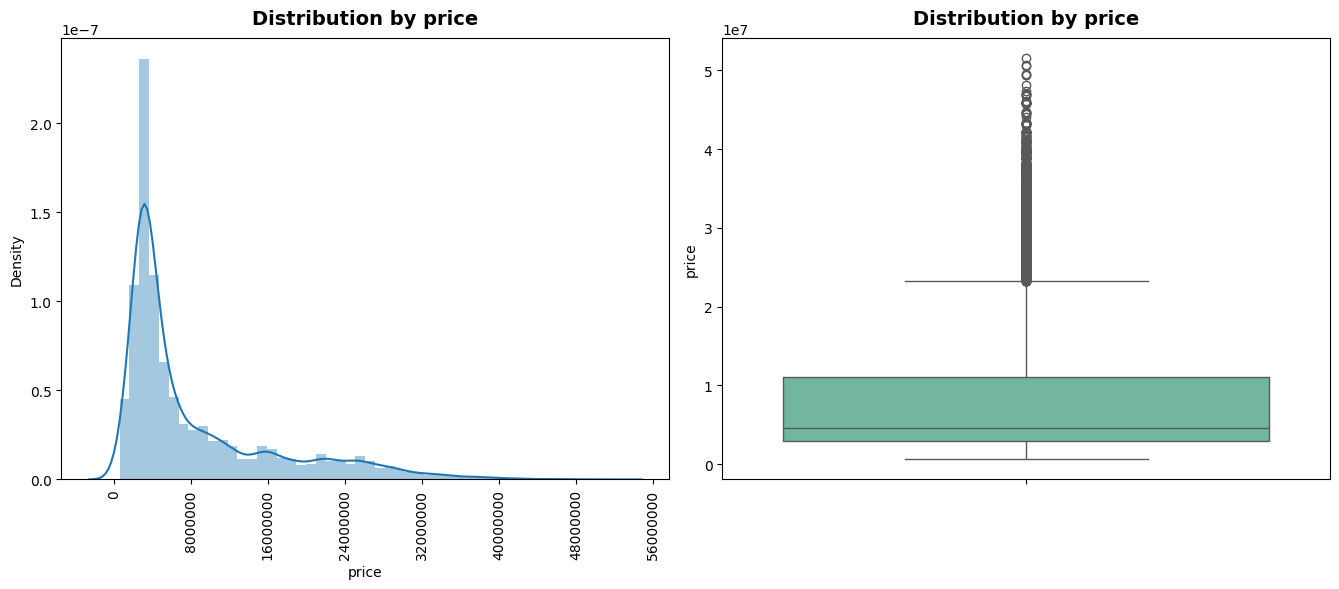

In [158]:
dist_box_plot(df, 'price')

Trong bộ data chứa dữ liệu của cả giá vé hạng Economy và hạng Business. Giá vé của hạng Business thì thường sẽ đắt hơn Economy nhưng vé hạng Economy thì phổ biến hơn. Vì vậy nên trong biểu đồ distribution thì mức giá vé rẻ chiếm range nhiều hơn. Tuy nhiên nếu nhìn biểu đồ boxplot thì thấy những giá trị vượt khỏi range trung bình được sắp xếp dày dặc và nhiều - bởi đó là phần thể hiện mức giá vé của hạng Business. Tức là không thể coi chúng như outliner được. Tuy nhiên phải tìm cách khác để check outliner thực sự có tồn tại không, vậy nên tạo 2 biểu đồ boxplot riêng cho 2 class type.

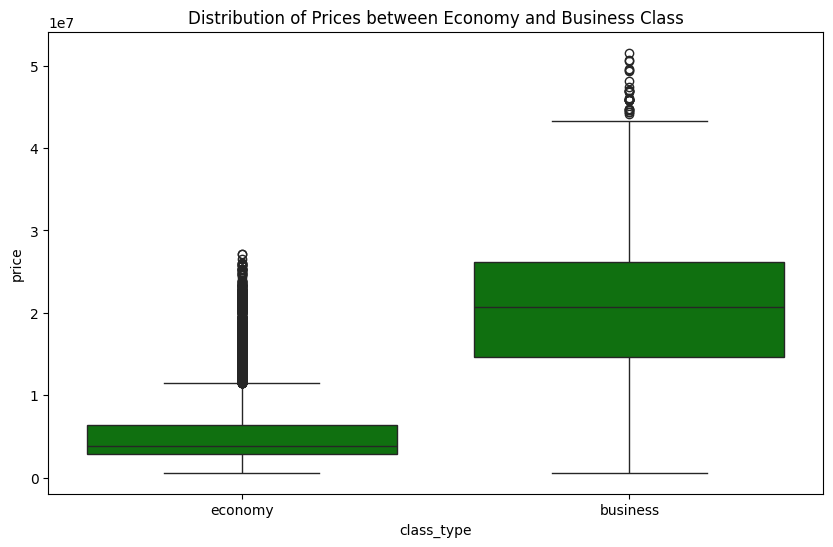

In [163]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class_type', y='price', data=df, showfliers=True,color='green')
plt.title('Distribution of Prices between Economy and Business Class')
plt.show()

In [187]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
economy_data = df[df['class_type'] == 'economy']
filtered_economy_data = remove_outliers(economy_data, 'price')
print('The number of outliners removed from class_type Economy: ',len(economy_data) - len(filtered_economy_data))

business_data = df[df['class_type'] == 'business']
filtered_business_data = remove_outliers(business_data, 'price')
print('The number of outliners removed from class_type Business: ',len(business_data) - len(filtered_business_data))


The number of outliners removed from class_type Economy:  1670
The number of outliners removed from class_type Business:  29


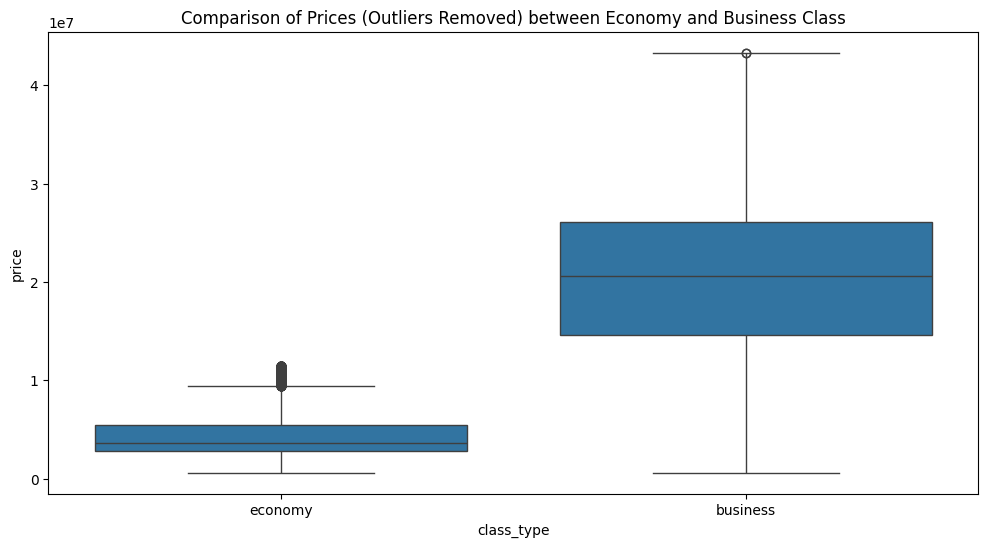

In [188]:
filtered_data = pd.concat([filtered_economy_data, filtered_business_data])

plt.figure(figsize=(12, 6))
sns.boxplot(x='class_type', y='price', data=filtered_data)
plt.title('Comparison of Prices (Outliers Removed) between Economy and Business Class')
plt.show()

### 2.Flying hours

C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\1306819144.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)
C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\1306819144.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, data=df, palette='Set2')


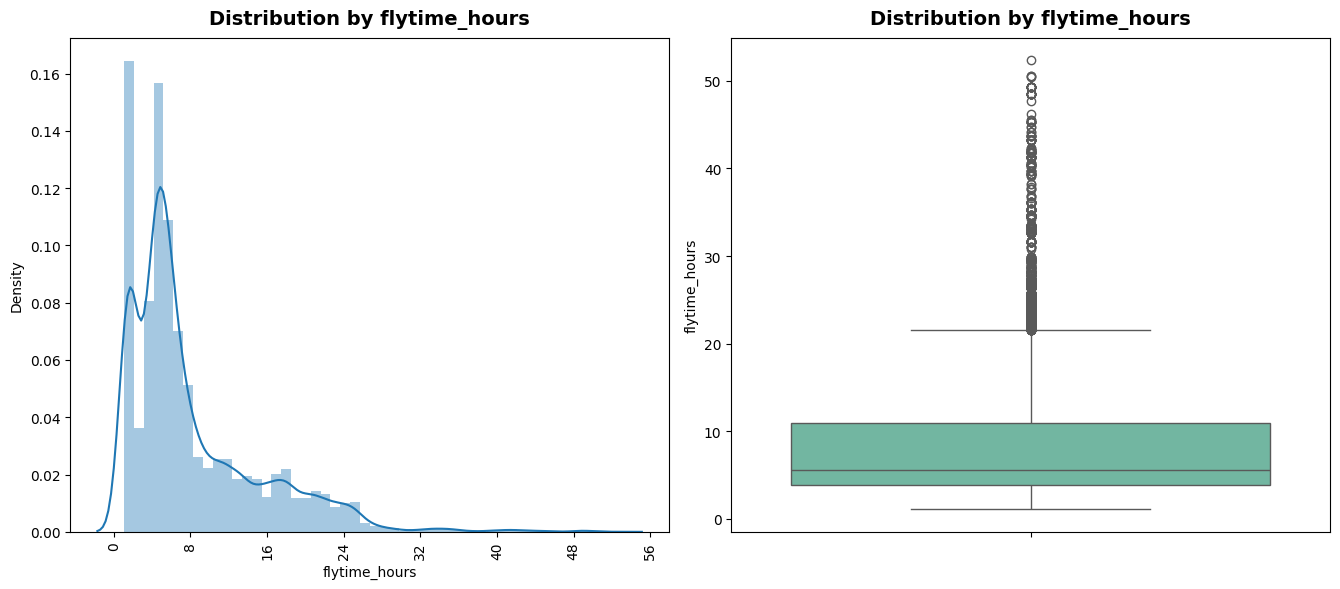

In [178]:
dist_box_plot(filtered_data,'flytime_hours')

The number of outliners removed:  4133


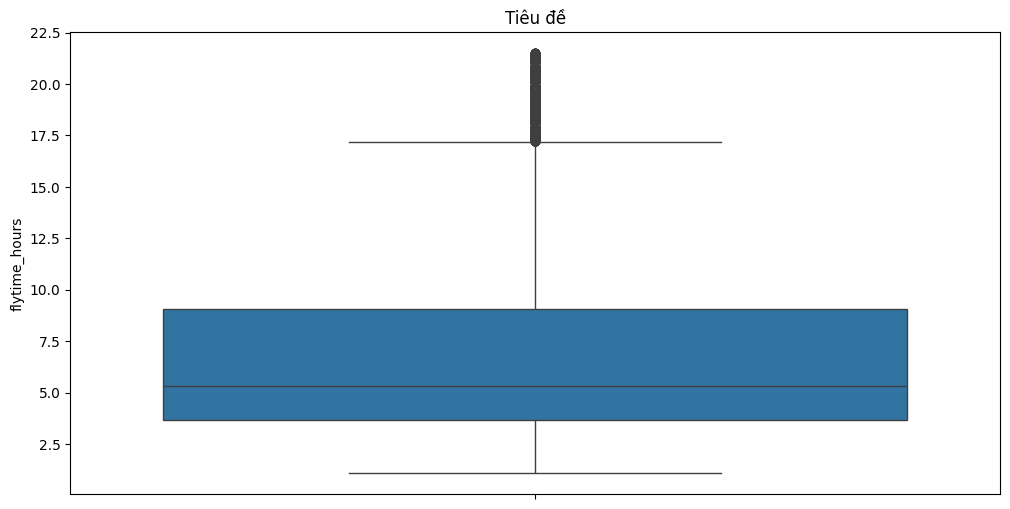

In [189]:
filter_data_2=remove_outliers(filtered_data,'flytime_hours')
print('The number of outliners removed: ', len(filtered_data)-len(filter_data_2))
plt.figure(figsize=(12, 6))
sns.boxplot(y='flytime_hours', data=filter_data_2)
plt.title('Tiêu đề')
plt.show()


ở đây thì sau khi lọc outliners, tương tự như với price ở economy class, lượng outliner vẫn còn tồn đọng, tuy nhiên với số lượng không đáng kể so với lượng outliner ban đầu nên có thể dữ lại để xem xét sau. nếu model hoạt động oke thì số outliner nhỏ này không ảnh hưởng nhiều.

## ENCODING

In [190]:
filter_data_2

,brand,dtime,atime,price,dcity,acity,flight_type,class_type,ddate,flytime_hours,dtime_category,atime_category,route
0,Vietravel Airlines,23:59:00,02:15:00,1377000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.266667,Late Night,Early Morning,ho-chi-minh-city -> hanoi
1,VietJet Air,22:25:00,00:35:00,1447000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.166667,Late Night,Early Morning,ho-chi-minh-city -> hanoi
2,VietJet Air,23:30:00,01:35:00,1447000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.083333,Late Night,Early Morning,ho-chi-minh-city -> hanoi
3,VietJet Air,23:40:00,01:50:00,1447000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.166667,Late Night,Early Morning,ho-chi-minh-city -> hanoi
4,VietJet Air,21:40:00,23:50:00,1563000,ho-chi-minh-city,hanoi,oneway,economy,2023-12-06,2.166667,Late Night,Late Night,ho-chi-minh-city -> hanoi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28238,Vietnam Airlines,14:45:00,08:55:00,24638000,dien-bien-phu,pleiku,oneway,business,2023-12-23,18.166667,Evening,Afternoon,dien-bien-phu -> pleiku
28241,Vietnam Airlines,14:45:00,07:50:00,23390000,dien-bien-phu,con-dao-island,oneway,business,2023-12-23,17.083333,Evening,Morning,dien-bien-phu -> con-dao-island
28242,Vietnam Airlines,14:45:00,07:50:00,22820000,dien-bien-phu,con-dao-island,oneway,business,2023-12-23,17.083333,Evening,Morning,dien-bien-phu -> con-dao-island
28245,Vietnam Airlines,14:45:00,08:55:00,20757000,dien-bien-phu,Can-tho,oneway,business,2023-12-23,18.166667,Evening,Afternoon,dien-bien-phu -> Can-tho


drop 3 cột dtime_category, atime_category, route và vì flight_type ở đây làm việc chỉ có 1 kiểu duy nhất là oneway nên drop 4 cột này

In [191]:
filtered_data_3=filter_data_2.drop(['flight_type','dtime_category','atime_category','route'],axis=1)


In [192]:
filtered_data_3

,brand,dtime,atime,price,dcity,acity,class_type,ddate,flytime_hours
0,Vietravel Airlines,23:59:00,02:15:00,1377000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.266667
1,VietJet Air,22:25:00,00:35:00,1447000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.166667
2,VietJet Air,23:30:00,01:35:00,1447000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.083333
3,VietJet Air,23:40:00,01:50:00,1447000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.166667
4,VietJet Air,21:40:00,23:50:00,1563000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.166667
...,...,...,...,...,...,...,...,...,...
28238,Vietnam Airlines,14:45:00,08:55:00,24638000,dien-bien-phu,pleiku,business,2023-12-23,18.166667
28241,Vietnam Airlines,14:45:00,07:50:00,23390000,dien-bien-phu,con-dao-island,business,2023-12-23,17.083333
28242,Vietnam Airlines,14:45:00,07:50:00,22820000,dien-bien-phu,con-dao-island,business,2023-12-23,17.083333
28245,Vietnam Airlines,14:45:00,08:55:00,20757000,dien-bien-phu,Can-tho,business,2023-12-23,18.166667


các cột phải encode: brand, dcity, acity, class_type. trong đó cột brand,dcity,acity thì thuộc norminal data, còn class_type thì thuộc ordinal_data. Vậy nên 3 cột brand, dcity, acity thì sẽ dùng Binary Encode, còn cột class_type thì dùng Ordinal Encoding. 

In [194]:
import category_encoders as ce

encoder_binary = ce.BinaryEncoder(cols=['brand', 'dcity', 'acity'])
encoded_data_binary = encoder_binary.fit_transform(filtered_data_3)

encoder_ordinal = ce.OrdinalEncoder(cols=['class_type'], mapping=[{'col': 'class_type', 'mapping': {'economy': 1, 'business': 2}}])
encoded_data_ordinal = encoder_ordinal.fit_transform(encoded_data_binary)

encoded_data_ordinal

,brand_0,brand_1,brand_2,dtime,atime,price,dcity_0,dcity_1,dcity_2,dcity_3,dcity_4,acity_0,acity_1,acity_2,acity_3,acity_4,class_type,ddate,flytime_hours
0,0,0,1,23:59:00,02:15:00,1377000,0,0,0,0,1,0,0,0,0,1,1,2023-12-06,2.266667
1,0,1,0,22:25:00,00:35:00,1447000,0,0,0,0,1,0,0,0,0,1,1,2023-12-06,2.166667
2,0,1,0,23:30:00,01:35:00,1447000,0,0,0,0,1,0,0,0,0,1,1,2023-12-06,2.083333
3,0,1,0,23:40:00,01:50:00,1447000,0,0,0,0,1,0,0,0,0,1,1,2023-12-06,2.166667
4,0,1,0,21:40:00,23:50:00,1563000,0,0,0,0,1,0,0,0,0,1,1,2023-12-06,2.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28238,0,1,1,14:45:00,08:55:00,24638000,1,0,0,0,1,0,1,0,1,0,2,2023-12-23,18.166667
28241,0,1,1,14:45:00,07:50:00,23390000,1,0,0,0,1,0,1,0,1,1,2,2023-12-23,17.083333
28242,0,1,1,14:45:00,07:50:00,22820000,1,0,0,0,1,0,1,0,1,1,2,2023-12-23,17.083333
28245,0,1,1,14:45:00,08:55:00,20757000,1,0,0,0,1,0,1,1,0,0,2,2023-12-23,18.166667


In [199]:
encoded_data_ordinal.dtypes

brand_0            int64
brand_1            int64
brand_2            int64
dtime             object
atime             object
price              int64
dcity_0            int64
dcity_1            int64
dcity_2            int64
dcity_3            int64
dcity_4            int64
acity_0            int64
acity_1            int64
acity_2            int64
acity_3            int64
acity_4            int64
class_type         int32
ddate             object
flytime_hours    float64
dtype: object

Vì dữ liệu của dtime, atime, ddate đều là dữ liệu thời gian nên cần phân tách chúng ra thành các cột riêng biệt để xử lí.
Hai cột dtime, atime sẽ được tách ra hai cột về giờ riêng, phút riêng. 
Còn ddate thì được lấy thông tin của riêng tháng và ngày thôi. 

In [200]:
encoded_data_ordinal['dtime'] = pd.to_datetime(encoded_data_ordinal['dtime'])
encoded_data_ordinal['atime'] = pd.to_datetime(encoded_data_ordinal['atime'])
encoded_data_ordinal['ddate'] = pd.to_datetime(encoded_data_ordinal['ddate'])

encoded_data_ordinal['dhour'] = encoded_data_ordinal['dtime'].dt.hour
encoded_data_ordinal['dminute'] = encoded_data_ordinal['dtime'].dt.minute

encoded_data_ordinal['ahour'] = encoded_data_ordinal['atime'].dt.hour
encoded_data_ordinal['aminute'] = encoded_data_ordinal['atime'].dt.minute

encoded_data_ordinal['dmonth'] = encoded_data_ordinal['ddate'].dt.month
encoded_data_ordinal['dday'] = encoded_data_ordinal['ddate'].dt.day

encoded_data_ordinal = encoded_data_ordinal.drop(['dtime', 'atime', 'ddate'], axis=1)

C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\2893117861.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  encoded_data_ordinal['dtime'] = pd.to_datetime(encoded_data_ordinal['dtime'])
C:\Users\2053s\AppData\Local\Temp\ipykernel_14932\2893117861.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  encoded_data_ordinal['atime'] = pd.to_datetime(encoded_data_ordinal['atime'])


In [201]:
encoded_data_ordinal

,brand_0,brand_1,brand_2,price,dcity_0,dcity_1,dcity_2,dcity_3,dcity_4,acity_0,...,acity_3,acity_4,class_type,flytime_hours,dhour,dminute,ahour,aminute,dmonth,dday
0,0,0,1,1377000,0,0,0,0,1,0,...,0,1,1,2.266667,23,59,2,15,12,6
1,0,1,0,1447000,0,0,0,0,1,0,...,0,1,1,2.166667,22,25,0,35,12,6
2,0,1,0,1447000,0,0,0,0,1,0,...,0,1,1,2.083333,23,30,1,35,12,6
3,0,1,0,1447000,0,0,0,0,1,0,...,0,1,1,2.166667,23,40,1,50,12,6
4,0,1,0,1563000,0,0,0,0,1,0,...,0,1,1,2.166667,21,40,23,50,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28238,0,1,1,24638000,1,0,0,0,1,0,...,1,0,2,18.166667,14,45,8,55,12,23
28241,0,1,1,23390000,1,0,0,0,1,0,...,1,1,2,17.083333,14,45,7,50,12,23
28242,0,1,1,22820000,1,0,0,0,1,0,...,1,1,2,17.083333,14,45,7,50,12,23
28245,0,1,1,20757000,1,0,0,0,1,0,...,0,0,2,18.166667,14,45,8,55,12,23


In [202]:
#save the dataframe 
encoded_data_ordinal.to_csv('processed_data.csv', index=False)